In [26]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [33]:
img_path = os.getenv('HOME')+'/repo/LibRobo/data/img/lib_11.jpg'
img = cv2.imread(img_path)

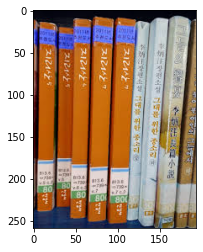

In [34]:
plt.imshow(img)

In [35]:
img2 = img.copy()
h, w = img.shape[:2]

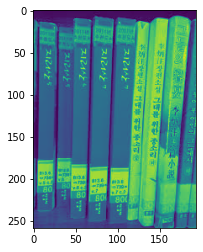

In [36]:
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(imgray)

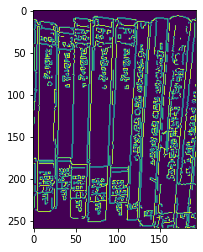

In [37]:
edges = cv2.Canny(imgray, 100, 200 )
plt.imshow(edges)

<ipython-input-39-b7f08f569239>:9: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(img2, (abs(x0), abs(y0)), 3, (0,0,255), -1)


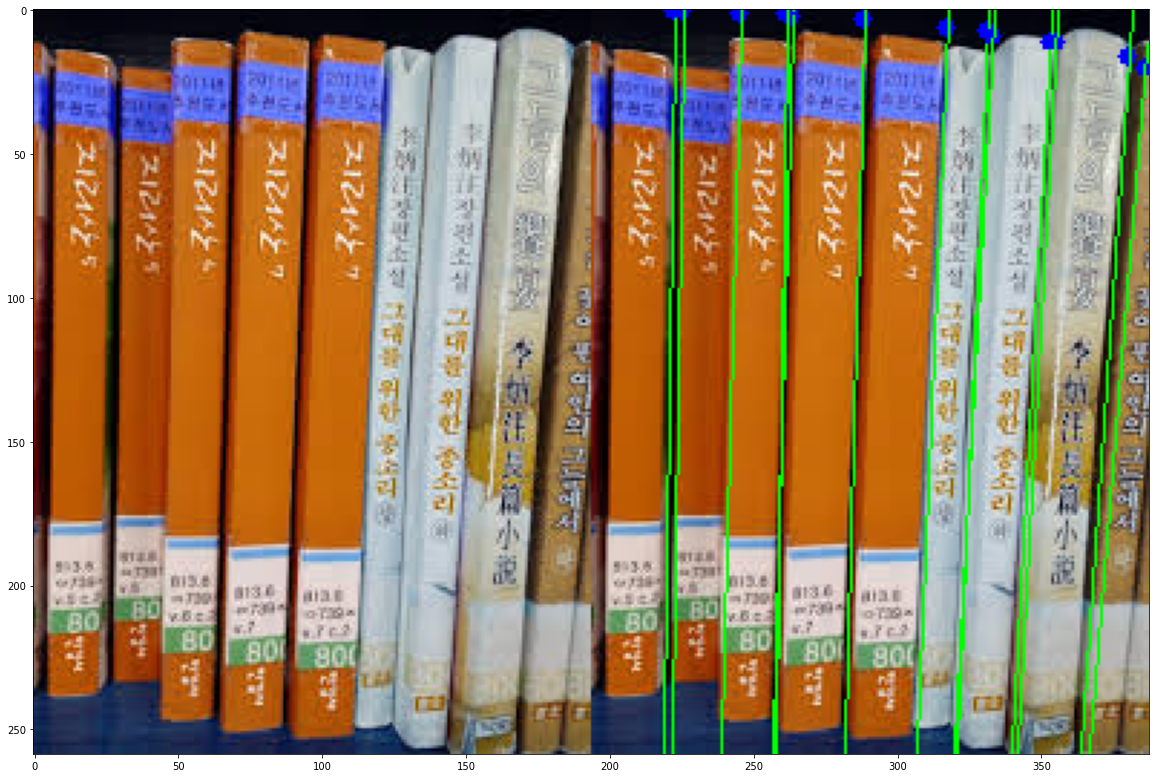

In [39]:
# 허프 선 검출, 직선으로 판단할 최소한의 점은 130개로 지정 ---②
lines = cv2.HoughLines(edges, 1, np.pi/180, 120)

for line in lines: # 검출된 모든 선 순회
    r,theta = line[0] # 거리와 각도
    tx, ty = np.cos(theta), np.sin(theta) # x, y축에 대한 삼각비
    x0, y0 = tx*r, ty*r  #x, y 기준(절편) 좌표
    # 기준 좌표에 빨강색 점 그리기
    cv2.circle(img2, (abs(x0), abs(y0)), 3, (0,0,255), -1)
    # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
    x1, y1 = int(x0 + w*(-ty)), int(y0 + h * tx)
    x2, y2 = int(x0 - w*(-ty)), int(y0 - h * tx)
    # 선그리기
    cv2.line(img2, (x1, y1), (x2, y2), (0,255,0), 1)

#결과 출력    
merged = np.hstack((img, img2))
plt.figure(figsize=(20, 20))
plt.imshow(merged)

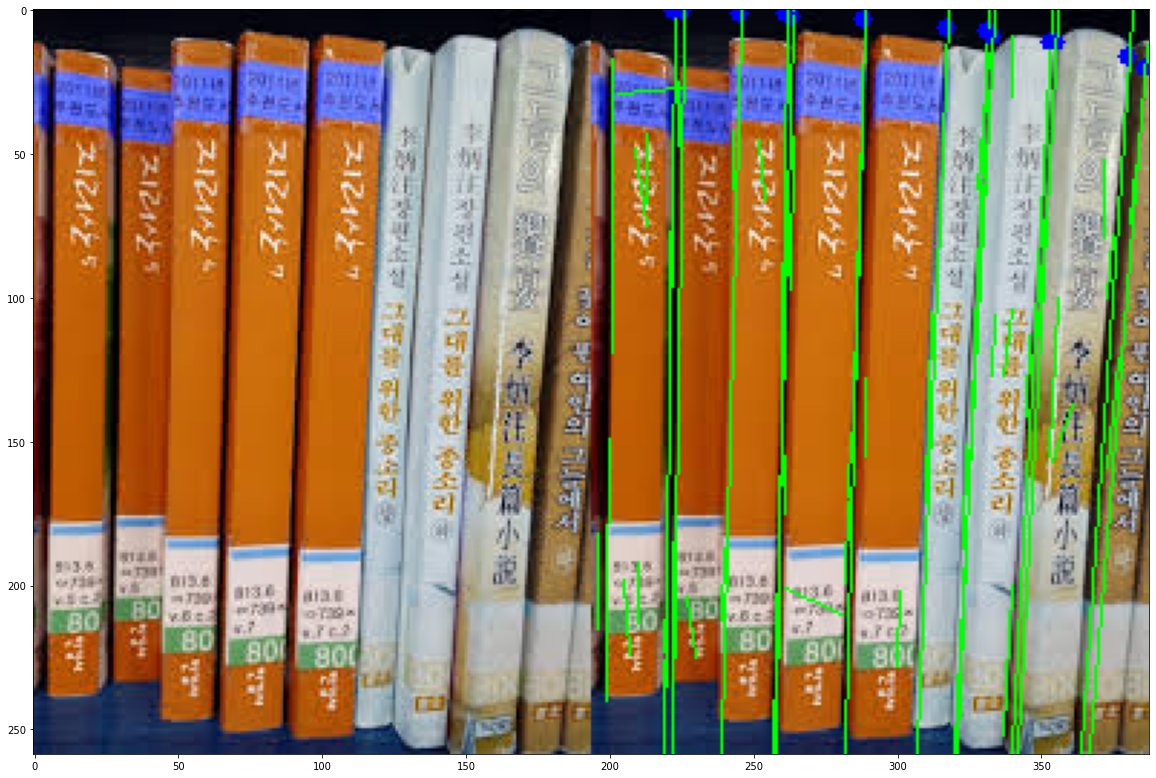

In [43]:
import cv2
import numpy as np

img_path = os.getenv('HOME')+'/repo/LibRobo/data/img/lib_11.jpg'
img = cv2.imread(img_path)
# 그레이 스케일로 변환 및 엣지 검출 ---①
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 50, 200 )

# 확율 허프 변환 적용 ---②
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, None, 20, 2)
for line in lines:
    # 검출된 선 그리기 ---③
    x1, y1, x2, y2 = line[0]
    cv2.line(img2, (x1,y1), (x2, y2), (0,255,0), 1)

merged = np.hstack((img, img2))
plt.figure(figsize=(20, 20))
plt.imshow(merged)